<a href="https://colab.research.google.com/github/JulianBeaupre/jube1/blob/master/Python_Exercise_2_Travel_Pony_Ad_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

DATA_URL = 'http://128.138.93.164/aprd6342/data/TravelPonyFacebook.csv'
df = pd.read_csv(DATA_URL)

In [0]:
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
df_clean = df[(df[['Amount Spent (USD)']] != 0).all(axis=1)] #CLEAN DATA TO NOT INCLUDE ZEROS

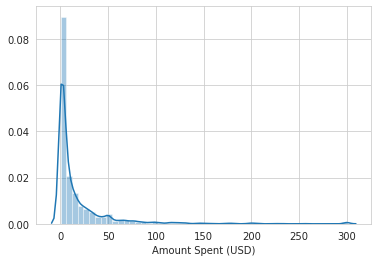

In [0]:
sns.set_style('whitegrid')   ##histogram of Amount Spent 
sns.distplot(df_clean['Amount Spent (USD)'])

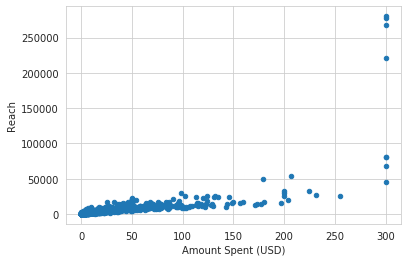

In [0]:
df.plot.scatter(x='Amount Spent (USD)', y='Reach')

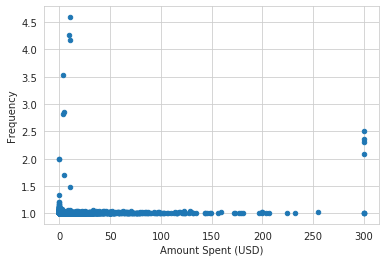

In [0]:
df.plot.scatter(x='Amount Spent (USD)', y='Frequency')

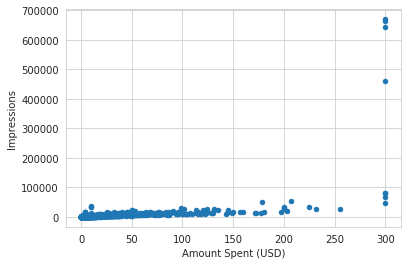

In [0]:
df.plot.scatter(x='Amount Spent (USD)', y='Impressions')

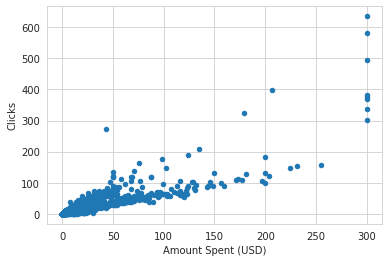

In [0]:
df.plot.scatter(x='Amount Spent (USD)', y='Clicks')

##THERE DOES SEEM TO BE SLIGHTLY LINEAR RELATIONSHIPS WITH REACH AND CLICKS BUT NOT FREQUENCY AND IMPRESSIONS. SINCE THERE IS SLIGHT LINEAR RELATIONSHIPS, I DO THINK LINEAR REGRESSION WILL BE APPROPRIATE.


##MULTIPLE REGRESSION

In [0]:
df_clean['Campaign Name'] = df_clean['Campaign Name'].astype('str')
df_clean['Campaign Name'] = df_clean['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_clean['Campaign Name'] = df_clean['Campaign Name'].str.replace('\d+', '')
df_clean.loc[df_clean['Campaign Name'].str.contains('travelpony', case = False), 'Campaign Name'] = 'TravelPony'
df_clean.loc[df_clean['Campaign Name'].str.contains('post', case = False), 'Campaign Name'] = 'Post'
campaign_name = pd.get_dummies(df_clean['Campaign Name'])
df_clean = pd.concat([df_clean, campaign_name], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
DEPVAR = df_clean['Amount Spent (USD)']
INVVAR = df_clean[['Ad ','Cyber Weekend','Nanigans','Post','SimpleMultiFillCampaign','TravelPony','Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]
model = sm.OLS(DEPVAR, INVVAR).fit()
predictions = model.predict(DEPVAR) # make the predictions by the model
model.summary()

ValueError: ignored

In [0]:
depvar = df_clean['Amount Spent (USD)']
invar = df_clean[['Ad ','Cyber Weekend','Nanigans','Post','SimpleMultiFillCampaign','TravelPony','Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]
model1 = sm.OLS(depvar, invar).fit()
predict = model1.predict(invar) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        04:00:12   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Ad                          0.1666      3.803      0.044      0.965      -7.292       7.625
Cyber Weekend            -193.3195     26.951     -7.173      0.000    -246.179    -140.460
Nanigans                   -2.3150      2.014     -1.149      0.251      -6.266       1.636
Post                      -12.0410      7.576     -1.589      0.112     -26.899       2.817
SimpleMultiFillCampaign    -0.0647      1.882     -0.034      0.973      -3.756       3.627
TravelPony                  7.2926      4.253      1.715      0.087      -1.048      15.633
Reach                       0.0033      0.000     20.921      0.000       0.003       0.004
Frequency                  -0.7778      1.836     -0.424      0.672      -4.378       2.823
Impressions                -0.0009   8.41e-05    -10.146      0.000      -0.001      -0.001
Clicks                     -0.3859      0.113     -3.413      0.001      -0.608      -0.164
Unique Clicks               0.5155      0.127      4.057      0.000       0.266       0.765
Page Likes                 24.4507      9.359      2.613      0.009       6.096      42.806
Page Engagement           -21.1451      9.355     -2.260      0.024     -39.494      -2.796
Post Engagement            18.0241      7.797      2.312      0.021       2.732      33.316
Post Likes                  2.6100      1.564      1.669      0.095      -0.458       5.678
Post Comments               3.5949      1.627      2.209      0.027       0.403       6.787
Post Shares                 4.9334      1.588      3.107      0.002       1.819       8.048
Photo Views                 3.3214      1.562      2.126      0.034       0.257       6.385
Website Clicks              3.5644      1.563      2.281      0.023       0.500       6.629
==============================================================================
Omnibus:                      796.064   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21680.838
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                      19.732   Cond. No.                     3.51e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##THREE PREDICTORS WITH HIGHEST PREDICTIVE VALUE

In [0]:
ModelSummary = []

In [0]:
ModelSummary = pd.concat([model.params, model.pvalues, ],axis=1)
ModelSummary.columns = ['Coef', 'Pvalue']
ModelSummary = ModelSummary[ModelSummary['Pvalue'] <= 0.05].sort_values('Coef', ascending = False)
ModelSummary['Rank'] = ModelSummary['Coef'].rank(ascending=0).astype(int)
ModelSummary

,Coef,Pvalue,Rank
Page Likes,24.450740,9.059883e-03,1
Post Engagement,18.024142,2.090729e-02,2
Post Shares,4.933423,1.920459e-03,3
Post Comments,3.594876,2.731019e-02,4
Website Clicks,3.564398,2.265358e-02,5
Photo Views,3.321407,3.363899e-02,6
Unique Clicks,0.515465,5.180673e-05,7
Reach,0.003310,4.302627e-87,8
Impressions,-0.000853,1.482248e-23,9
Clicks,-0.385926,6.578548e-04,10


##THE THREE PREDICTORS WITH THE HIGHEST PREDICTIVE VALUE ARE "PAGE LIKES", "POST ENGAGEMENT" AND "POST SHARES"